In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [3]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# 한글 폰트 설정

# pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 0. 데이터 불러오기
- 데이터 출처
  - [Kaggle `Netflix Movies and TV Shows`](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- 데이터 명세

  | 변수명          | 변수 설명                                                   |
  |-----------------|-----------------------------------------------------------|
  | show_id         | 각 쇼의 고유 ID                                            |
  | type            | 쇼의 카테고리로 영화 또는 TV 쇼                             |
  | title           | 쇼의 이름                                                  |
  | director        | 쇼의 감독 이름                                             |
  | cast            | 배우의 이름 및 쇼의 다른 출연진                             |
  | country         | Netflix에서 프로그램을 시청할 수 있는 국가의 이름            |
  | date_added      | Netflix에 프로그램이 추가된 날짜                            |
  | release_year    | 쇼의 출시 연도                                             |
  | rating          | 넷플릭스 등급 표시                                         |
  | duration        | 쇼의 지속 시간                                             |
  | listed_in       | 쇼의 장르                                                  |
  | description     | 쇼를 설명하는 일부 텍스트                                   |


In [6]:
df = pd.read_csv('netflix.csv')

# 1. 데이터 살펴보기

## 1.1 기본 정보 살펴보기

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 1.2 결측치 확인

**비율** 확인

In [11]:
# for 반복문을 통해 각 컬럼별 결측치 비율을 계산하여 문자열로 출력
# .isna( ) : 결측 값은 True 반환, 그 외에는 False 반환
for i in df.columns :
    missingValueRate = df[i].isna().sum() / len(df) * 100 
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


**개수** 확인
- `info()`
  - 데이터에 대한 전반적인 정보 제공
    - 컬럼명
    - 컬럼별 결측치
    - 컬럼별 데이터 타입
    - 행과 열의 크기
- `isna().sum()` == `isnull().sum()`
  - 각 컬럼별 결측치 개수 반환
  - 결측 값은 True 반환, 그 외에는 False 반환하며, 데이터프레임 내에 결측 값을 확인하기 위해 사용

`info`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


`.isna().sum()`

In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 2. 전처리

## 2.1 결측치 처리
- `fillna()`
  - 결측값을 특정 값으로 채우거나 대체하여 처리
- `.replace(np.nan, '문자')`
  - 결측치를 문자열 바꾸기 함수를 통해 처리
- `.dropna(axis = 0)`
  - 결측치가 있는 행 전체 제거
- 원본 객체를 변경하려면 `inplace = True` 옵션 추가

`fillna()`

In [ ]:
# 결측치 비율 : country(9.44%)
df['country'].fillna('No Data', inplace = True)

`replace`

In [ ]:
# 결측치 비율 : director(29.91%), cast(9.1%)
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_59750/1826993592.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].replace(np.nan, 'No Data',inplace  = True)


`dropna`

In [ ]:
# .dropna(axis = 0) : 결측치가 있는 행 전체 제거
# 결측치 비율 : date_added(0.11%), rating(0.05%), duration(0.03%)
df.dropna(axis = 0, inplace=True)

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2.2 Feature Engineering
- Feature Engineering
  
  - 기존에 존재하는 변수를 활용하여 새로운 정보를 추가로 생성하는 과정

### 날짜
- Netflix의 `data_added` 변수 이용해 `year_added`(개봉한 연도)와 `month_added`(개봉한 월) 정보를 변수로 생성
  
  - `.to_datetime()`
    - 시간 형식의 object 타입의 컬럼을 datetime 타입으로 변환
  - `.dt.year` 
    - datetime에서 연도 정보 추출
  - `.dt.month` 
    - datetime에서 월 정보 추출

In [25]:
# to_datetime() : 시간 형식의 object 타입의 컬럼을 datetime 타입으로 변환
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [26]:
# .dt.year : datetime에서 연도 정보 추출
# .dt.month : datetime에서 월 정보 추출
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


### 시청 등급(age_group)
- 시청 등급 설명표를 참고하여 Netflix의 rating 변수를 이용한 age_group(시청 등급) 정보를 변수로 생성

- `.map( )` 
  - 사전에 정의한 내용을 변수에 적용

- [넷플릭스 시청 등급 설명표](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [27]:
# rating 변수의 값 파악
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
# netflix['age_group']를 생성하여 netflix['rating'] 값 삽입
# age_group 변수에 딕셔너리로 시청 등급에 대한 key, value 선언
# .map( ) : 사전에 정의한 내용을 변수에 적용
df['age_group'] = df['rating']

age_group = {'TV-MA': 'Adults',
            'R': 'Adults',
            'PG-13': 'Teens',
            'TV-14': 'Young Adults',
            'TV-PG': 'Older Kids',
            'NR': 'Adults',
            'TV-G': 'Kids',
            'TV-Y': 'Kids',
            'TV-Y7': 'Older Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'NC-17': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'UR': 'Adults'}

df['age_group'] = df['age_group'].map(age_group)

In [29]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults


# 3. 데이터 파악

## 3.1 오징어 게임(Squid Game) 탐색
- `str.contains()`

  - 지정한 문자열이 포함되어 있으면 True 반환, 그 외에는 False 반환
  - `na = False`
    - 값이 NA일 경우, False로 처리
  - `case = False`
    - 대소문자 구분하지 않고 검색

In [30]:
df["title"].str.contains('squid game', na = False, case = False)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: title, Length: 8790, dtype: bool

In [31]:
# 오징어 게임을 검색한 조건을 netflix 원본 데이터에 넣어서 True인 값만 출력
df[df["title"].str.contains('Squid Game', na = False, case = False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
33,s34,TV Show,Squid Game,No Data,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",No Data,2021-09-17,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,2021,9,Adults


## 3.2 Netflix Movie & TV show 비율

- `plt.pie( )` 
  - 파이 플롯 시각화
> - labels 
>   - 부채꼴 조각 이름
> - autopct 
>   - 부채꼴 안에 표기될 숫자 형식 지정
>              문자열 % 포맷팅으로 %0.f 형태는 소수점 없이 정수처럼 인식
>              진짜 %를 표시하기 위해 %%로 작성 
> - startangle 
>   - 부채꼴이 그려지는 시작 각도 설정, 90이면 12시 방향
> - explode 
>   - 부채꼴이 파이 플롯의 중심에서 벗어나는 정도 설정
> - shadow 
>   - 그림자 효과 표시
 
- `plt.suptitle( )` 
  - 전체 플롯의 제목
- `plt.title( )` 
  - 서브 플롯의 제목

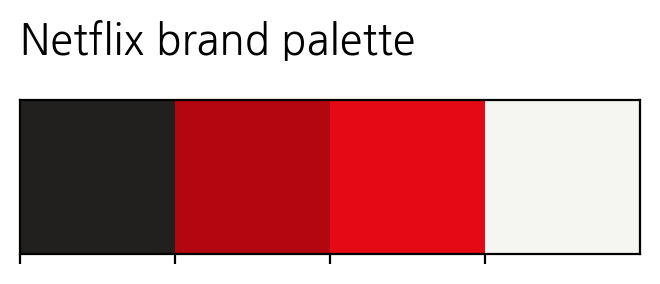

In [34]:
# 넷플릭스 브랜드 상징 색깔 시각화
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ", loc='left', fontsize=15, y=1.2)
plt.show()

In [69]:
# Movies & TV shows의 각각 value_counts 출력
# .value_counts( ) : 값의 개수 출력
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [70]:
# .T : 전치(Transpose) 변환  
ratio = pd.DataFrame(df['type'].value_counts()).T
ratio

type,Movie,TV Show
count,6126,2664


In [65]:
ratio.loc['count']

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [60]:
ratio

type,Movie,TV Show
count,6126,2664


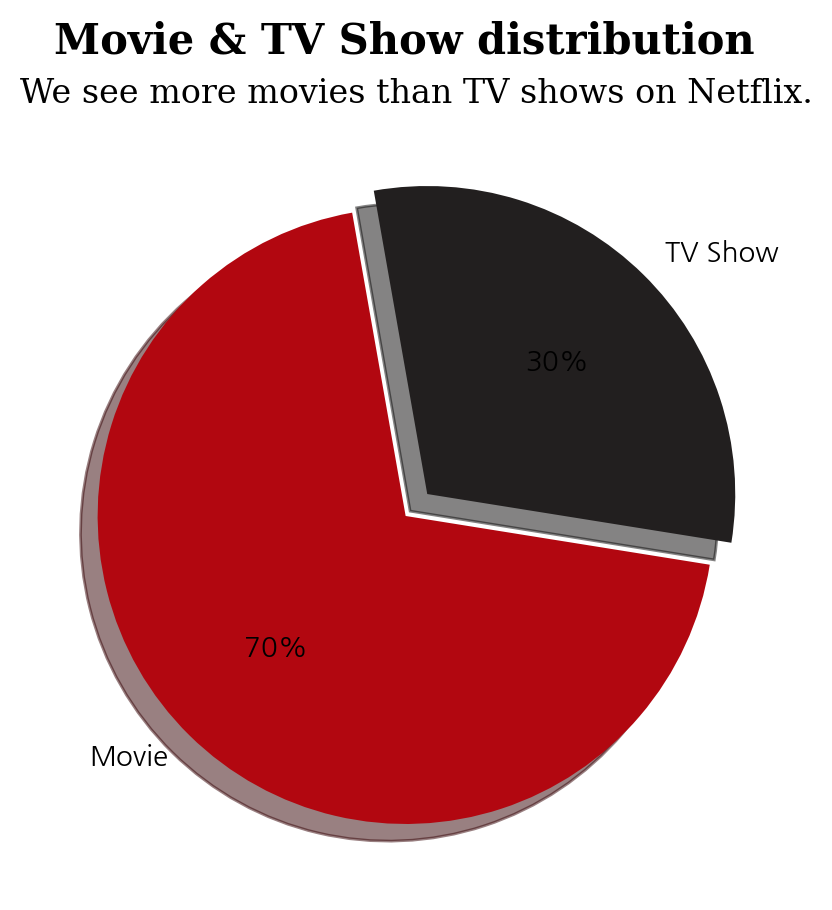

In [74]:
# 'type' 행만 1차원 배열로 추출
plt.figure(figsize=(5, 5))

plt.pie(ratio.loc['count'], labels=ratio.columns, autopct='%0.f%%', startangle=100,
        explode=[0.05, 0.05], shadow=True, colors=['#b20710', '#221f1f'])

# 제목 설정
plt.suptitle('Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12)

plt.show()


## 3.3 연도별 Movie & TV Show 수치

- `countplot( )` : 각 범주에 속하는 데이터의 개수를 막대 그래프 시각화

  > - data : 카운트 플롯에서 사용할 데이터 셋
  > - x : x축 설정
  > - hue : 특정 열 데이터로 색상을 구분하여 출력


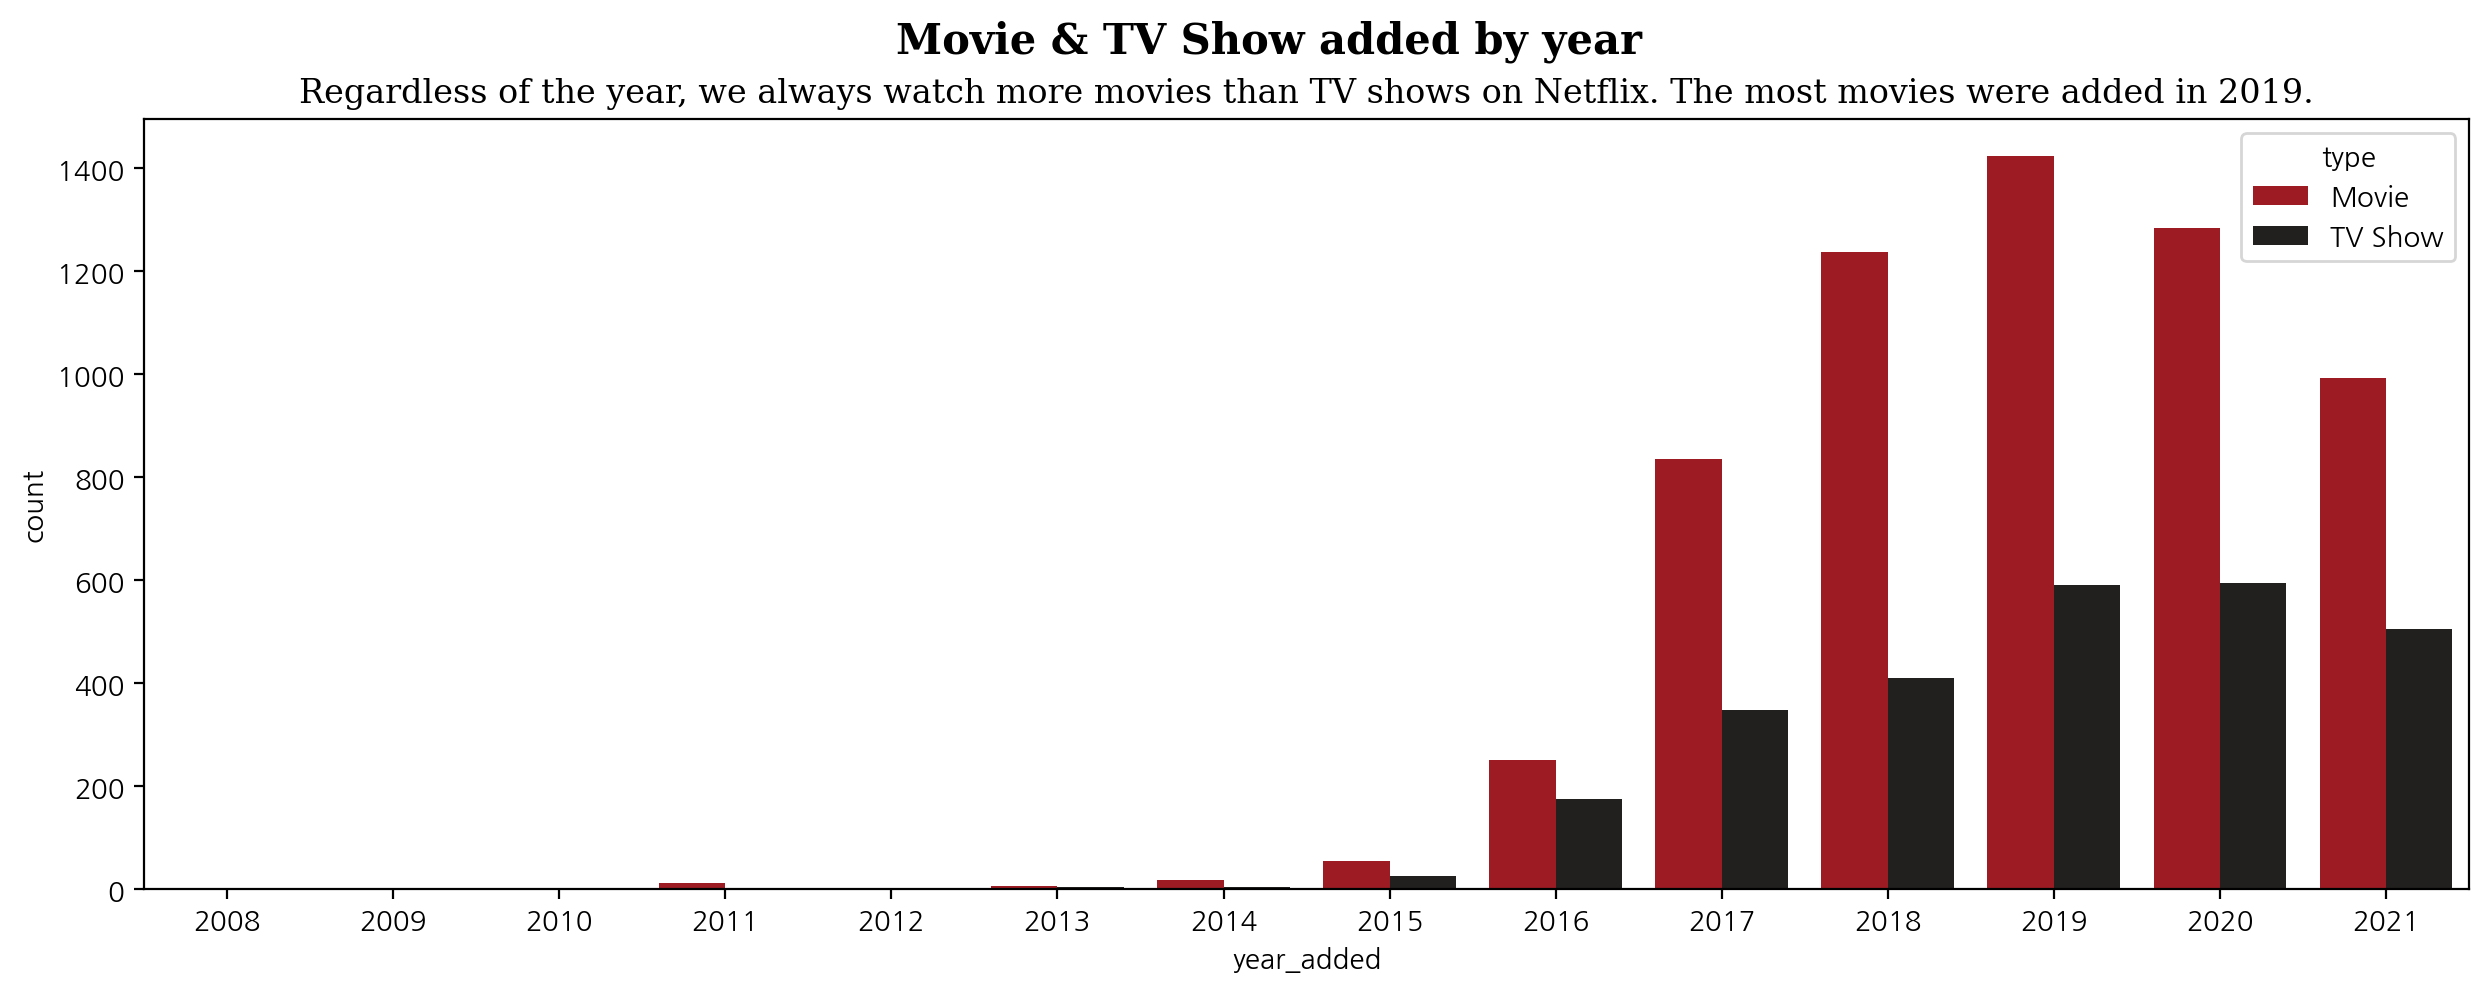

In [76]:
# 연도별 Movies & TV shows 수치 시각화
# 항상 Movies가 TV shows보다 압도적인지 궁금!
# countplot( ) : 각 범주에 속하는 데이터의 개수를 막대 그래프 시각화
# data : countplot에서 사용할 데이터 셋
# x : x축 설정
# hue : 특정 열 데이터로 색상을 구분하여 출력
plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='year_added', hue='type', palette=['#b20710', '#221f1f']) 

plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('Regardless of the year, we always watch more movies than TV shows on Netflix. The most movies were added in 2019.', fontfamily='serif', fontsize=12)

plt.show()

## 3.4 월별 Movies & TV show 수치 시각화

- `unstack( )` : 인덱스를 컬럼으로 바꾸는 역할
  > - <-> stack( ) : 컬럼을 인덱스로 바꾸는 역할
- `fill_between( )` : x축을 기준으로 그래프 영역을 채우는 함수
  > - <-> fill_betweenx( ) : y축을 기준으로 그래프 영역을 채우는 함수
  > - x : 곡선을 정의하는 노드의 x 좌표
  > - y1 : 첫 번째 곡선을 정의하는 노드의 y 좌표
  > - y2 : 두 번째 곡선을 정의하는 노드의 y 좌표
  > - label : 'Movie', 'TV Show' 문자열 입력
  > - alpha : 투명도 

- `xticks(x, month_name)` : x축의 눈금 레이블에 month_name 값의 순서대로 설정

In [77]:
# 월별로 Movies & TV shows 수치 출력
# .groupby( ) : 그룹별 집계, 개봉한 월로 묶고 타입의 개수 구하기
# .value_counts( ) : 값의 개수 출력
# .unstack( ) : 인덱스를 컬럼으로 바꾸는 역할(wide 포맷)
netflix_month = df.groupby('month_added')['type'].value_counts().unstack()
netflix_month

type,Movie,TV Show
month_added,,
1,545,192
2,382,180
3,528,213
4,549,214
5,439,193
6,492,236
7,565,262
8,518,236
9,518,251


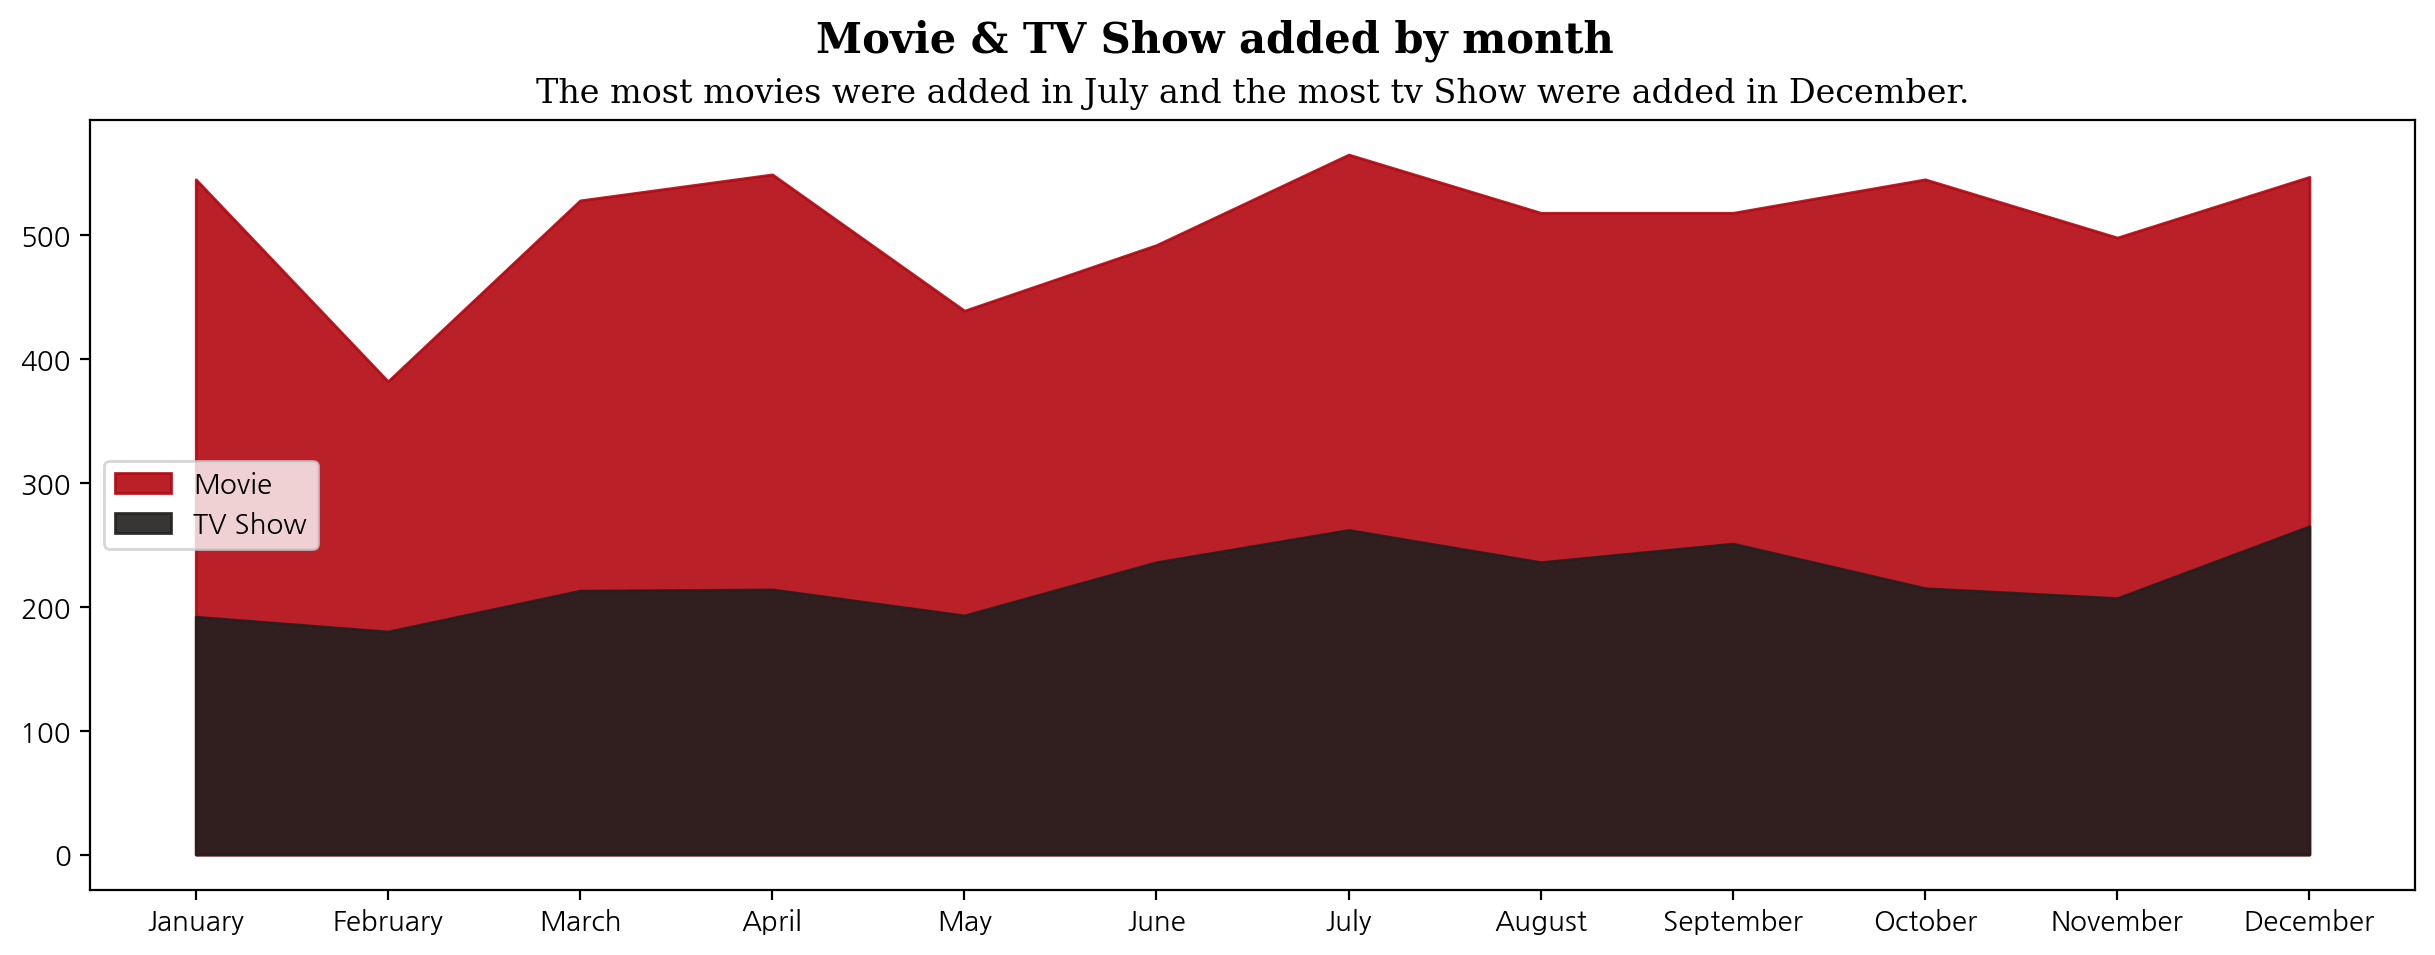

In [79]:
# 월별로 Movies & TV shows 수치 시각화

# fill_between() : x축을 기준으로 그래프 영역을 채우는 함수
# x : 곡선을 정의하는 노드의 x 좌표
# y1 : 첫 번째 곡선을 정의하는 노드의 y 좌표
# y2 : 두 번째 곡선을 정의하는 노드의 y 좌표
# alpha : 투명도 
# label : 'Movie', 'TV Show' 문자열 입력

# xticks(x, month_name) : x축의 눈금 레이블에 month_name 값의 순서대로 설정
# legend() 함수를 사용해서 그래프에 범례 표시
plt.figure(figsize=(15, 5))
 
plt.fill_between(x=netflix_month['Movie'].index, y1=0, y2=netflix_month['Movie'], color='#b20710', alpha=0.9, label = 'Movie')
plt.fill_between(x=netflix_month['TV Show'].index, y1=0, y2=netflix_month['TV Show'], color='#221f1f', alpha=0.9, label = 'TV Show')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'])  

plt.legend()

plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most movies were added in July and the most tv Show were added in December.', fontfamily='serif', fontsize=12)

plt.show()

## 3.5 나라별 타겟팅 연령
-  시청 등급 컬럼 활용

- `heatmap( )`
  - 직사각형 데이터를 색으로 행렬을 표현하여 시각화
열을 뜻하는 heat와 지도를 뜻하는 map을 결합시켜 색상으로 다양한 정보를 제공
  > - cmp : 시각화 시키는 컬러맵
  > - linewidth : 각 셀을 분할할 선의 너비
  > - annot : True라면 각 셀에 데이터 값 표시
  > - fmt : 문자열 형식화 코드
  >        .0% = X
  >        .1% = X.x
  >        .2% = X.xx 

- `plt.matplotlib.colors.LinearSegmentedColormap.from_list( )` 
  - 컬러맵 생성 

In [81]:
# 나라별 타겟팅하는 연령 수치화 
# .groupby( ) : 그룹별 집계, 시청 등급으로 묶고 나라의 개수 구하기
# .value_counts( ) : 값의 개수 출력
# .unstack( ) : 인덱스를 컬럼으로 바꾸는 역할(wide 포맷)
netflix_age_country = df.groupby('age_group')['country'].value_counts().unstack()
netflix_age_country

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,NaN,1.0,42.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,1.0,NaN
Kids,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
Older Kids,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Young Adults,1.0,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN


In [82]:
# 특정 나라별 타겟팅하는 특정 연령 선택하여 수치화
# .loc[] : 행 이름과 열 이름을 사용하여 특정 행과 열 선택
# .fillna(0, inplace = True) : 결측치를 0으로 대체하여 원본 데이터에 저장
age_order = ['Kids','Older Kids','Teens','Adults']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 
                 'France', 'South Korea', 'Spain', 'Mexico', 'Turkey']

netflix_age_country = netflix_age_country.loc[age_order, country_order]

netflix_age_country.fillna(0, inplace = True)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,198.0,14.0,42.0,32.0,3.0,12.0,5.0,3.0,2.0,1.0
Older Kids,515.0,151.0,82.0,40.0,60.0,7.0,23.0,6.0,9.0,9.0
Teens,289.0,4.0,8.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0
Adults,1403.0,253.0,214.0,80.0,87.0,83.0,88.0,122.0,85.0,64.0


In [83]:
# 나라별 타겟팅하는 연령별 비율을 알고 싶기 때문에 열(나라)마다 총합을 구하여 각각 나누어주면 연령별 비율을 알 수 있음
# .sum(axis=0) : 열 기준으로 더하기
# .div(axis=1) : 행 기준으로 나누기
netflix_age_country = netflix_age_country.div(netflix_age_country.sum(axis=0), axis=1)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,0.082328,0.033175,0.121387,0.206452,0.019608,0.116505,0.043103,0.022727,0.020619,0.013514
Older Kids,0.214137,0.357820,0.236994,0.258065,0.392157,0.067961,0.198276,0.045455,0.092784,0.121622
Teens,0.120166,0.009479,0.023121,0.019355,0.019608,0.009709,0.000000,0.007576,0.010309,0.000000
Adults,0.583368,0.599526,0.618497,0.516129,0.568627,0.805825,0.758621,0.924242,0.876289,0.864865


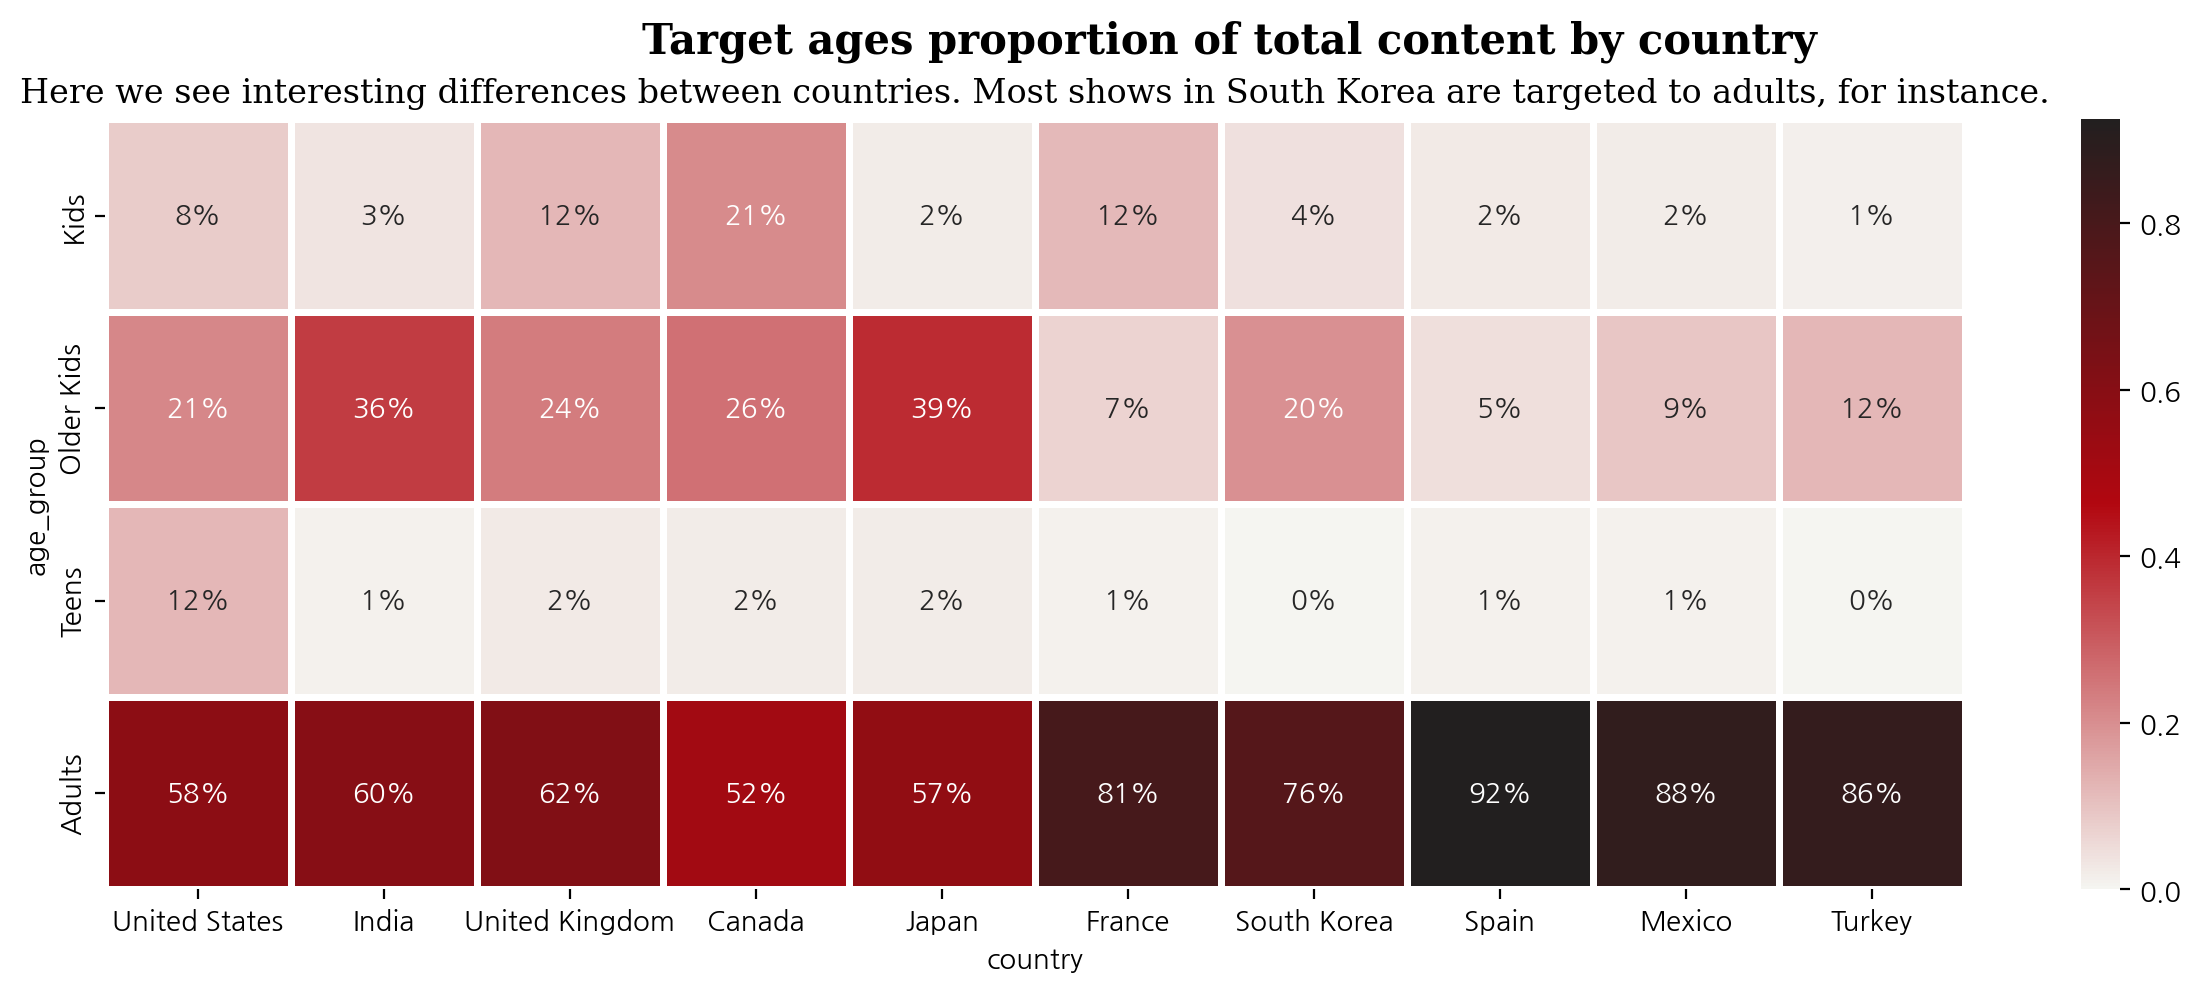

In [85]:
# 나라별 타겟팅하는 연령 시각화하여 인사이트 얻기
# heatmap() : 직사각형 데이터를 색으로 행렬을 표현하여 시각화
#             열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시켜 색상으로 다양한 정보를 제공
# cmp : 시각화 시키는 컬러맵
# linewidth : 각 셀을 분할할 선의 너비
# annot : True라면 각 셀에 데이터 값 표시
# fmt : 문자열 형식화 코드
#       .0% = X
#       .1% = X.x
#       .2% = X.xx 
# plt.matplotlib.colors.LinearSegmentedColormap.from_list( ) : 컬러맵 생성 
plt.figure(figsize=(15, 5))

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1','#b20710','#221f1f'])

sns.heatmap(netflix_age_country, cmap = cmap, linewidth=2.5, annot=True, fmt='.0%')

plt.suptitle('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15)   
plt.title('Here we see interesting differences between countries. Most shows in South Korea are targeted to adults, for instance.',fontsize=12,fontfamily='serif') 

plt.show()

## 3.6 키워드 워드 클라우드
- 워드 클라우드
  - 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각화하는 기법

- `from wordcloud import WordCloud`
  - 워드 클라우드 생성에 필요한 모듈
- `from PIL import Image` 
  - 워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지


- `WordCloud( ).generate(text)`
  - 선언해준 text에서 wordcloud를 생성
  > - `text 변환` : wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고 str(문자열)로 2차 변환
  > - `mask` : 단어를 그릴 위치 설정, 흰색(#FFFFFF) 항목은 마스킹된 것으로 간주
  > - `plt.matplotlib.colors.LinearSegmentedColormap.from_list( )` : 컬러맵 생성

- `plt.imshow( )`
  - array에 색을 채워서 이미지로 표시
- `plt.axis('off')`
  - 축 삭제

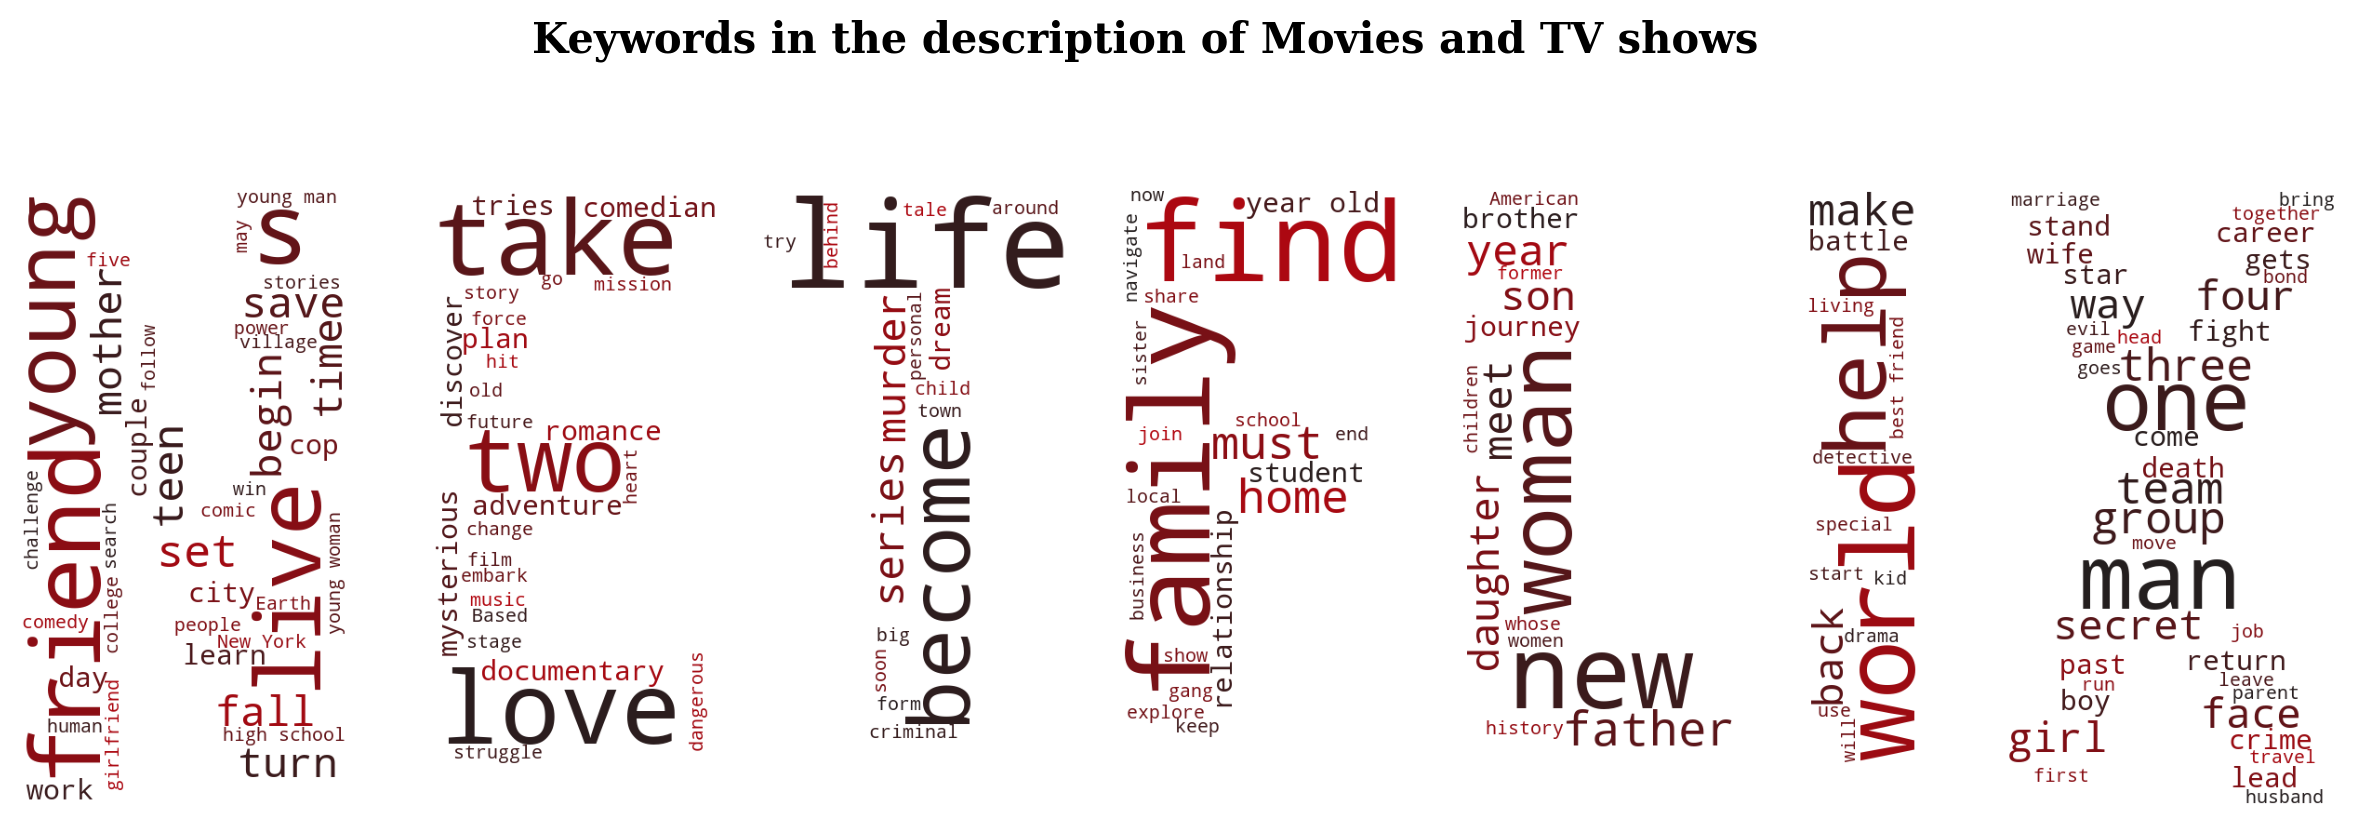

In [87]:
# 넷플릭스 데이터의 description 변수를 이용한 워드 클라우드 생성

# from wordcloud import WordCloud : 워드 클라우드 생성에 필요한 모듈
# from PIL import Image : 워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지

# wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고 str(문자열)로 2차 변환
# mask : 단어를 그릴 위치 설정, 흰색(#FFFFFF) 항목은 마스킹된 것으로 간주
# plt.matplotlib.colors.LinearSegmentedColormap.from_list( ) : 컬러맵 생성

# WordCloud( ).generate(text) : 선언해준 text에서 wordcloud를 생성
# plt.imshow( ) : array에 색을 채워서 이미지로 표시
# plt.axis('off') : 축 삭제
from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize=(15, 5))

text = str(list(df['description']))
mask = np.array(Image.open('netflix_logo.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170, mask = mask, colormap=cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=15)   

plt.imshow(wordcloud)
plt.axis('off')
plt.show()